# Market Basket Analysis Project Documentation
<div class="alert alert-block alert-info">
    <ul>
        <li><b>Name:</b> Palli Muhammed Suhaib</li>
        <li><b>Register Number:</b> 311421104060</li>
        <li><b>Program and Year:</b> B.E. CSE, 3rd Year, 5th Semester</li>
        <li><b>College:</b> Meenakshi College of Engineering - 3114</li>
    </ul>
</div>

***
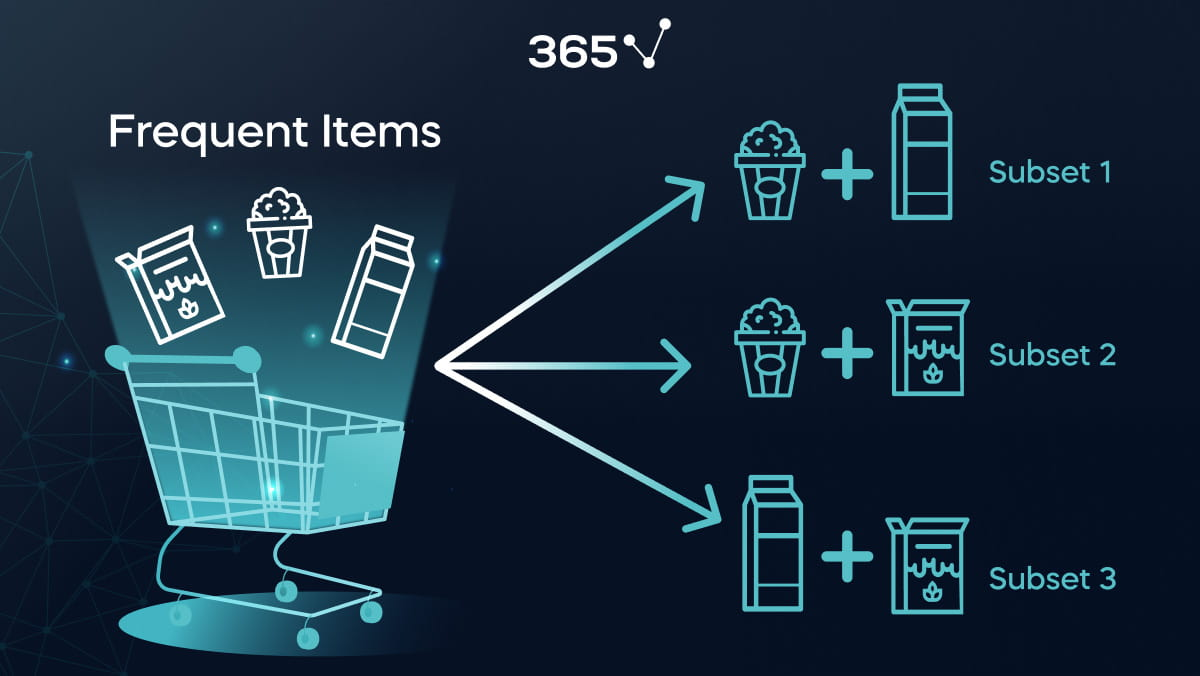
<div class="alert alert-block alert-success">
    <h2>Problem Statement</h2>
    <p>The problem at hand is to analyze transaction data from a retail store and uncover valuable insights about customer behavior. By identifying frequent itemsets and generating association rules, we aim to provide actionable recommendations for cross-selling and improving sales strategies.</p>
</div>


<div class="alert alert-block alert-info">
    <h2>Dataset Used:</h2>
    <p>The dataset used for this project was obtained from Kaggle. You can access the dataset at <a href="https://www.kaggle.com/datasets/aslanahmedov/market-basket-analysis">Kaggle Market Basket Analysis Dataset</a>.</p>
</div>


***
### Design Thinking Process
Our approach to solving this problem involved the following key steps:

1. __Library Imports:__ We started by importing essential libraries like pandas, numpy, matplotlib, and mlxtend for data analysis and visualization.

2. __Data Preparation:__ We loaded the dataset from Kaggle, cleaned it by handling missing values, and calculated additional features like 'SumPrice' to represent the total cost of each item in a transaction. We also identified the best-selling items in different countries.

3. __Data Transformation:__ We converted the data into a transactional format, making it suitable for association analysis.

4. __Association Analysis:__ We applied the Apriori algorithm to identify frequent itemsets and generate association rules based on the lift metric.

5. __Insight Generation:__ The association rules provided valuable insights into customer behavior, cross-selling opportunities, and product bundling strategies.

***
### Phases of Development
The project development can be divided into the following phases:

1. __Data Preprocessing:__ Cleaning and preparing the dataset for analysis, including handling missing values, calculating 'SumPrice,' and identifying best-selling items.

2. __Data Transformation:__ Converting the data into a transactional format for association analysis.

3. __Association Analysis:__ Applying the Apriori algorithm to discover frequent itemsets and association rules.

4. __Visualization and Interpretation:__ Visualizing and interpreting the results to gain actionable insights.

5. __Documentation & Submission:__ Preparing this document, including code snippets and project submission.

***

### Dataset Description
The dataset used for this project is available on __[Kaggle Market Basket Analysis Dataset](https://www.kaggle.com/datasets/aslanahmedov/market-basket-analysis)__. It contains transaction data from a retail store. The dataset comprises information about customer transactions, including details about the items purchased, their quantities, prices, customer IDs, and the country where the transaction occurred. Here is a brief overview of the dataset's key attributes:

<div class="alert alert-block alert-info">
    <ul>
        <li><b>Itemname:</b> The name or description of the product or item purchased.</li>
        <li><b>Quantity:</b> The quantity of each item purchased in a transaction.</li>
        <li><b>Price:</b> The price of each item.</li>
        <li><b>CustomerID:</b> Unique identifier for each customer.</li>
        <li><b>Country:</b> The country where the transaction took place.</li>
        <li><b>BillNo:</b> A unique identifier for each transaction or bill.</li>
        <li><b>SumPrice:</b> The total price for each item in a transaction (calculated as Quantity * Price).</li>
    </ul>
</div>




***
### Data Preprocessing Steps
Data preprocessing is a crucial step in preparing the dataset for Market Basket Analysis. In this project, several preprocessing steps were performed:

1. __Handling Missing Values:__ Initially, the dataset was checked for missing values in the 'Itemname' and 'CustomerID' columns. Rows with missing values in these columns were removed to ensure data quality and consistency.

2. __Removing Non-positive Quantity Entries:__ Rows where the 'Quantity' column had non-positive values were removed, as they do not represent valid transactions.

3. __Handling Duplicates:__ Duplicate rows were checked and removed from the dataset to avoid double-counting transactions.

4. __Handling Missing Customer IDs:__ In some cases, there were missing customer IDs. To handle this, missing customer IDs were filled with a placeholder value (e.g., 99999). This allowed the dataset to include transactions from unidentified customers.

5. __Creating 'SumPrice' Column:__ A new column called 'SumPrice' was created by multiplying the 'Quantity' and 'Price' columns. This column represents the total price for each item in a transaction.

6. __Identifying Best Selling Items:__ The best-selling items in each country were identified by grouping the data by 'Country' and 'Itemname' and aggregating the 'Quantity' values. This step helped in tailoring marketing and inventory strategies to specific countries.

***

<div class="alert alert-block alert-info">
    <h3>Data Import and Setup</h3>
    <p>This code is responsible for importing necessary libraries and reading data from an Excel file. It uses the pandas library to load the data into a DataFrame named 'data' and sets it up for further analysis. It also imports the numpy library for numerical operations and the matplotlib library for data visualization.</p>
    <p>The data is read from the file located at "C:\Users\Lenovo\Desktop\IBMPhase1\Assignment-1_Data.xlsx".</p>
</div>


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_excel("C:\\Users\\Lenovo\\Desktop\\IBMPhase1\\Assignment-1_Data.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


<div class="alert alert-block alert-info">
    <h3>Testing Data Import</h3>
    <p>This code is used to test whether the data has been successfully imported. It displays the first 10 rows of the imported data, providing a quick preview to ensure data integrity.</p>
</div>

In [4]:
#testing whether the data is been imported
data.head(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
data.describe()

,Quantity,Price,CustomerID
count,522064.000000,522064.000000,388023.000000
mean,10.090435,3.826801,15316.931710
std,161.110525,41.900599,1721.846964
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13950.000000
50%,3.000000,2.080000,15265.000000
75%,10.000000,4.130000,16837.000000
max,80995.000000,13541.330000,18287.000000


In [6]:
data.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

<div class="alert alert-block alert-info">
<h3>Handling the Missing Values</h3>
<p>Currently, we are checking the dataset for missing values in the 'Itemname' and 'CustomerID' columns. We are removing rows with missing values in these columns to ensure data quality and consistency.</p>
</div>

In [7]:
#removing null values from itemname and the customerID column
data.dropna(axis=0, subset=['Itemname'], inplace = True)
data.dropna(axis=0, subset=['CustomerID'], inplace = True)

<div class="alert alert-block alert-info">
<h3>Removing Non-positive Quantity Entries</h3>
<p>We are currently removing rows where the 'Quantity' column has non-positive values, as they do not represent valid transaction.</p>
</div>

In [8]:
#Dropping rows where Quantity <=0
data = data[data["Quantity"]>0]
data.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

<div class="alert alert-block alert-info">
<h3>Handling Duplicates</h3>
<p>We are checking for duplicate rows and removing them from the dataset to avoid double-counting transactions.</p>
</div>

In [9]:
# Removing duplicates
data.drop_duplicates()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


<div class="alert alert-block alert-info">
<h3>Handling Missing Customer IDs</h3>
<p>In some cases, there are missing customer IDs. To handle this, we are filling missing customer IDs with a placeholder value (e.g., 99999). This allows the dataset to include transactions from unidentified customers.</p>
    
<h3>Creating 'SumPrice' Column</h3>
<p>We are currently creating a new column called 'SumPrice' by multiplying the 'Quantity' and 'Price' columns. This column represents the total price for each item in a transaction.</p>    
</div>

In [10]:
#Fill missing customer IDs
data['CustomerID'].fillna(99999, inplace=True)
#Create SumPrice column
data["SumPrice"]=data["Quantity"]*data["Price"]

<div class="alert alert-block alert-info">
<h3>Identifying Best Selling Items</h3>
<p>We are identifying the best-selling items in each country by grouping the data by 'Country' and 'Itemname' and aggregating the 'Quantity' values. This step is helping us tailor marketing and inventory strategies to specific countries.</p>
</div>


In [11]:
#Find the best selling items in each country
best_selling_items = data.groupby(['Country', 'Itemname']).agg({'Quantity': 'sum'}).reset_index()
best_selling_items = best_selling_items.groupby('Country').apply(lambda x: x[x['Quantity'] == x['Quantity'].max()]).reset_index(drop=True)
best_selling_items.sort_values("Quantity",ascending=False)

,Country,Itemname,Quantity
46,United Kingdom,"PAPER CRAFT , LITTLE BIRDIE",80995
24,Netherlands,RABBIT NIGHT LIGHT,4801
12,France,RABBIT NIGHT LIGHT,4000
19,Japan,RABBIT NIGHT LIGHT,3408
0,Australia,MINI PAINT SET VINTAGE,2952
41,Sweden,MINI PAINT SET VINTAGE,2916
13,Germany,ROUND SNACK BOXES SET OF4 WOODLAND,1233
40,Spain,CHILDRENS CUTLERY POLKADOT PINK,729
42,Switzerland,PLASTERS IN TIN WOODLAND ANIMALS,636
25,Norway,SMALL FOLDING SCISSOR(POINTED EDGE),576


<div class="alert alert-block alert-info">
    <h3>Total Sales by Country</h3>
    <p>This code is used to calculate and display the total sales for each country in the dataset.It involves grouping the data by the 'Country' column and then aggregating the 'SumPrice' column to find the sum of sales in each country. The results are then sorted in descending order, showing the highest total sales first. This information can be valuable for understanding the sales performance in different countries and tailoring marketing and inventory strategies accordingly.</p>
</div>


In [12]:
#Find the total sales by country.
sales = data.groupby(['Country']).agg({'SumPrice': 'sum'}).reset_index()
sales = sales.sort_values('SumPrice', ascending=False).reset_index(drop=True)
sales

,Country,SumPrice
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,Germany,228867.140
3,France,209024.050
4,Australia,138521.310
5,Spain,61577.110
6,Switzerland,56443.950
7,Belgium,41196.340
8,Sweden,38378.330
9,Japan,37416.370


<div class="alert alert-block alert-info">
    <h3>Visualizing Total Sales by Country</h3>
    <p>This code uses a bar chart to visualize the total sales by country. It plots the 'Country' on the x-axis and 'SumPrice' (total sales) on the y-axis. The y-axis is scaled logarithmically to accommodate a wide range of sales values. Rotated x-axis labels enhance readability.</p>
</div>

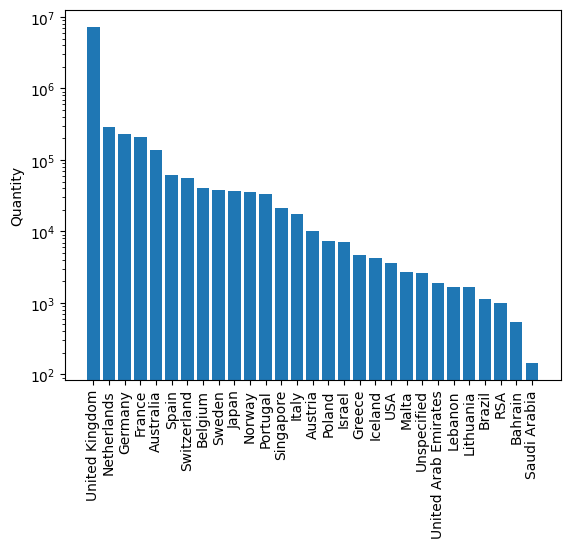

In [13]:
#Visualizing Total sales by country.
plt.bar(sales["Country"],sales["SumPrice"])
plt.yscale('log')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
    <h3>Filter and Rank Best-Selling Items in the UK</h3>
    <p>This code filters the data to select records from the "United Kingdom" (UK) and then ranks the best-selling items in the UK based on the quantity sold. It groups the UK data by 'Itemname,' calculates the sum of 'Quantity' for each item, and sorts the results in descending order to identify the top-selling items in the UK.</p>
</div>


In [14]:
#Filter the UK data and rank the best-selling items in the UK by quantity sold.
uk_data = data[data["Country"] == "United Kingdom"]
uk_data.groupby("Itemname")["Quantity"].sum().sort_values(ascending=False)

Itemname
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS      49182
JUMBO BAG RED RETROSPOT                41981
WHITE HANGING HEART T-LIGHT HOLDER     34648
                                       ...  
WHITE STONE/CRYSTAL EARRINGS               1
CHERRY BLOSSOM PURSE                       1
BLUE/GREEN SHELL NECKLACE W PENDANT        1
BLUE/NAT SHELL NECKLACE W PENDANT          1
CAPIZ CHANDELIER                           1
Name: Quantity, Length: 3833, dtype: int64

<div class="alert alert-block alert-info">
    <h3>Identify Globally Top-Earning Items</h3>
    <p>This code identifies the top-earning items globally. It calculates the mean 'Price' and the total 'Quantity' and 'SumPrice' (total revenue) for each item. It also counts the number of times each item appears in the dataset. The results are sorted in descending order based on 'SumPrice' to reveal the items with the highest total revenue globally.</p>
</div>

In [15]:
#Let's identify the globally top-earning items.
top_revenue_items = data.groupby(['Itemname']).agg({'Price': 'mean', 'Quantity': 'sum', 'SumPrice': 'sum'}).reset_index()
top_revenue_items['Count'] = data.groupby(['Itemname']).size().values
top_revenue_items = top_revenue_items.sort_values("SumPrice", ascending=False)

top_revenue_items

,Itemname,Price,Quantity,SumPrice,Count
2295,"PAPER CRAFT , LITTLE BIRDIE",2.080000,80995,168469.600,1
2738,REGENCY CAKESTAND 3 TIER,12.490140,11679,134253.100,1643
3667,WHITE HANGING HEART T-LIGHT HOLDER,2.894241,35425,96931.550,1976
1741,JUMBO BAG RED RETROSPOT,2.015462,45715,84316.260,1591
1969,MEDIUM CERAMIC TOP STORAGE JAR,1.222368,77436,80846.970,190
...,...,...,...,...,...
2418,PINK CRYSTAL GUITAR PHONE CHARM,0.850000,1,0.850,1
3525,VINTAGE BLUE TINSEL REEL,0.420000,2,0.840,1
2902,SET 12 COLOURING PENCILS DOILEY,0.650000,1,0.650,1
1605,HEN HOUSE W CHICK IN NEST,0.420000,1,0.420,1


<div class="alert alert-block alert-info">
    <h1 style="font-size: 20px;"><b>Feature Extraction Techniques</b></h1>
    <ul>
        <li><b>Transforming into Transactional Format:</b> To perform association rule mining, the dataset was transformed into a transactional format. The 'BillNo' and 'Itemname' columns were used to create a matrix where rows represented transactions (bills), and columns represented items. The values in the matrix were binary, indicating whether a specific item was present in a transaction.</li>
</div>


In [16]:
#Convert the dataset into transactional format
transactions = data.groupby(['BillNo'])['Itemname'].apply(list)
transactions

BillNo
536365    [WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...
536366    [HAND WARMER UNION JACK, HAND WARMER RED POLKA...
536367    [ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...
536368    [JAM MAKING SET WITH JARS, RED COAT RACK PARIS...
536369                           [BATH BUILDING BLOCK WORD]
                                ...                        
581583    [LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA...
581584    [RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...
581585    [BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT...
581586    [LARGE CAKE STAND  HANGING STRAWBERY, SET OF 3...
581587    [CIRCUS PARADE LUNCH BOX, PLASTERS IN TIN CIRC...
Name: Itemname, Length: 18163, dtype: object

<div class="alert alert-block alert-info">
    <h1 style="font-size: 20px;"><b>Feature Extraction Techniques</b></h1>
    <ul>
        <li><b>One-Hot Encoding:</b> The transactional data was one-hot encoded to convert product columns into binary (0 or 1) values, as the exact number of products purchased in a transaction was not significant for association analysis.</li>
    </ul>
</div>


In [17]:
#Create a one-hot matrix of the products
one_hot = pd.get_dummies(data['Itemname'])
one_hot

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#Add the BillNo column back to the one-hot encoded matrix
one_hot['BillNo']=data['BillNo']
one_hot

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,BillNo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,536365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522059,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587
522060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587
522061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587
522062,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,581587


In [19]:
#Now, we group the One-Hot Matrix by BillNo and sum the values
one_hot = one_hot.groupby('BillNo').sum()
one_hot

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


<div class="alert alert-block alert-info">
    <h3>Merging Transactional Data</h3>
    <p>In this step, the code merges the one-hot encoded matrix with the transactional data. It combines the 'transactions' DataFrame with the 'one_hot' DataFrame based on the 'BillNo' column to create a consolidated 'transaction_matrix.' This matrix is used to represent the transactions and the presence of items, which is essential for further analysis and association rule mining.</p>
</div>


In [20]:
#Now, we merge the one-hot encoded matrix, with the transactional data
transaction_matrix = pd.merge(transactions, one_hot, on='BillNo')
transaction_matrix

,Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,[BATH BUILDING BLOCK WORD],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,"[LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,"[BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT...",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [21]:
 #Now we have to convert the product columns to 0s and 1s. We are converting sum values to binary as number doesn't matter
transaction_matrix[one_hot.columns[:-1]] = (transaction_matrix[one_hot.columns[:-1]] >= 1).astype(int)
transaction_matrix

,Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
536365,"[WHITE HANGING HEART T-LIGHT HOLDER, WHITE MET...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,"[HAND WARMER UNION JACK, HAND WARMER RED POLKA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,"[ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHO...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,"[JAM MAKING SET WITH JARS, RED COAT RACK PARIS...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,[BATH BUILDING BLOCK WORD],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,"[LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,"[BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT...",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


<div class="alert alert-block alert-info">
    <h1 style="font-size: 24px;"><b>Association Analysis</b></h1>
    <ul>
        <li><b>Algorithm Used:</b> We employed the Apriori algorithm to identify frequent itemsets and generate association rules based on the lift metric.</li>
        <li><b>Results:</b> The results of the association analysis are included in the project code files.</li>
    </ul>
</div>


In [22]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [23]:
print(transaction_matrix.dtypes)

Itemname                            object
10 COLOUR SPACEBOY PEN               int32
12 COLOURED PARTY BALLOONS           int32
12 DAISY PEGS IN WOOD BOX            int32
12 EGG HOUSE PAINTED WOOD            int32
                                     ...  
ZINC T-LIGHT HOLDER STARS SMALL      int32
ZINC TOP  2 DOOR WOODEN SHELF        int32
ZINC WILLIE WINKIE  CANDLE STICK     int32
ZINC WIRE KITCHEN ORGANISER          int32
ZINC WIRE SWEETHEART LETTER TRAY     uint8
Length: 3847, dtype: object


<div class="alert alert-block alert-info">
    <h3>Frequent Itemset Mining</h3>
    <p>This code transforms the data in the 'transaction_matrix' by converting all columns except the first one into boolean values. It then performs frequent itemset mining using the Apriori algorithm on the transformed data. The 'min_support' parameter is set to 0.01, meaning that only itemsets that appear in at least 1% of transactions are considered. The result, 'frequent_itemsets,' contains the frequent itemsets and their support values.</p>
</div>


In [24]:
transaction_matrix.iloc[:, 1:] = transaction_matrix.iloc[:, 1:].astype(bool)
#Perform frequent itemset mining
frequent_itemsets = apriori(transaction_matrix.iloc[:, 1:], min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.013049,(10 COLOUR SPACEBOY PEN)
1,0.010130,(12 MESSAGE CARDS WITH ENVELOPES)
2,0.015086,(12 PENCIL SMALL TUBE WOODLAND)
3,0.016792,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.015911,(12 PENCILS SMALL TUBE SKULL)
...,...,...
963,0.014040,"(LUNCH BAG WOODLAND, LUNCH BAG RED RETROSPOT, ..."
964,0.012113,"(LUNCH BAG WOODLAND, LUNCH BAG RED RETROSPOT, ..."
965,0.013379,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY..."
966,0.012002,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY..."


<div class="alert alert-block alert-info">
    <h3>Generating Association Rules</h3>
    <p>This code generates association rules using the frequent itemsets previously mined. It uses the 'association_rules' function with the 'lift' metric and a minimum threshold of 1 to extract meaningful association rules. The result, 'rules,' contains the generated rules, including antecedents, consequents, support, confidence, and lift.</p>
</div>


In [25]:
# generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.018554,0.054617,0.010075,0.543027,9.942534,0.009062,2.068794,0.916426
1,(PACK OF 72 RETROSPOT CAKE CASES),(60 CAKE CASES DOLLY GIRL DESIGN),0.054617,0.018554,0.010075,0.184476,9.942534,0.009062,1.203454,0.951383
2,(72 SWEETHEART FAIRY CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.026427,0.034686,0.011617,0.439583,12.673257,0.010700,1.722494,0.946097
3,(60 TEATIME FAIRY CAKE CASES),(72 SWEETHEART FAIRY CAKE CASES),0.034686,0.026427,0.011617,0.334921,12.673257,0.010700,1.463844,0.954191
4,(PACK OF 60 DINOSAUR CAKE CASES),(60 TEATIME FAIRY CAKE CASES),0.028079,0.034686,0.011782,0.419608,12.097361,0.010808,1.663210,0.943839
...,...,...,...,...,...,...,...,...,...,...
933,"(LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...","(LUNCH BAG BLACK SKULL., LUNCH BAG CARS BLUE)",0.028079,0.022959,0.010461,0.372549,16.226877,0.009816,1.557159,0.965484
934,(LUNCH BAG CARS BLUE),"(LUNCH BAG BLACK SKULL., LUNCH BAG PINK POLKA...",0.052194,0.016572,0.010461,0.200422,12.093899,0.009596,1.229934,0.967829
935,(LUNCH BAG BLACK SKULL.),"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKA...",0.057204,0.015031,0.010461,0.182868,12.166425,0.009601,1.205398,0.973495
936,(LUNCH BAG PINK POLKADOT),"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU...",0.050322,0.014205,0.010461,0.207877,14.634412,0.009746,1.244498,0.981036


In [26]:
#Let's see the top 10 rules by lift
rules.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
529,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK),0.013269,0.013489,0.010130,0.763485,56.600762,0.009952,4.171038,0.995542
528,(REGENCY MILK JUG PINK),(REGENCY SUGAR BOWL GREEN),0.013489,0.013269,0.010130,0.751020,56.600762,0.009952,3.963101,0.995764
530,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.013544,0.016572,0.011397,0.841463,50.775748,0.011172,6.203160,0.993765
531,(REGENCY TEA PLATE ROSES),(REGENCY TEA PLATE GREEN),0.016572,0.013544,0.011397,0.687708,50.775748,0.011172,3.158758,0.996825
505,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.013434,0.016902,0.010901,0.811475,48.009211,0.010674,5.214691,0.992504
504,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE LIVINGROOM),0.016902,0.013434,0.010901,0.644951,48.009211,0.010674,2.778677,0.996006
561,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.017398,0.015306,0.012608,0.724684,47.346860,0.012342,3.576590,0.996211
560,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.015306,0.017398,0.012608,0.823741,47.346860,0.012342,5.574762,0.994095
506,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE LIVINGROOM),0.018499,0.013434,0.011452,0.619048,46.080991,0.011203,2.589736,0.996738
507,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.013434,0.018499,0.011452,0.852459,46.080991,0.011203,6.652395,0.991620


<div class="alert alert-block alert-info">
    <h3>Visualizing Association Rules</h3>
    <p>This code creates a scatter plot to visualize the association rules. It uses the 'lift' values on the x-axis and 'confidence' values on the y-axis to represent the rules. The code defines tooltips for each point on the scatter plot to display details about each rule, including antecedents, consequents, support, confidence, and lift. The 'mpld3' library is used to add interactivity and tooltips to the plot, making it more accessible and informative.</p>
</div>


In [27]:
import mpld3

# create scatter plot with x and y as lift and confidence values
fig, ax = plt.subplots()
scatter = ax.scatter(rules['lift'], rules['confidence'], alpha=0.5)

# Define tooltips
tooltips = []
for i in range(len(rules)):
    rule = rules.iloc[i]
    tooltip = f"Rule: {rule['antecedents']} -> {rule['consequents']}\nSupport: {rule['support']:.3f}\nConfidence: {rule['confidence']:.3f}\nLift: {rule['lift']:.3f}"
    tooltips.append(tooltip)

# Add tooltips to scatter plot using mpld3
mpld3.plugins.connect(fig, mpld3.plugins.PointHTMLTooltip(scatter, tooltips))

# Set axis labels and title
ax.set_xlabel("Lift")
ax.set_ylabel("Confidence")
ax.set_title("Association Rules Scatter Plot")

# Show the plot
mpld3.display()

In [28]:
rules[(rules['lift'] > 40) & (rules['lift'] < 50)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
78,(CHILDRENS CUTLERY SPACEBOY),(CHILDRENS CUTLERY DOLLY GIRL),0.017123,0.014480,0.011232,0.655949,45.300356,0.010984,2.864455,0.994962
79,(CHILDRENS CUTLERY DOLLY GIRL),(CHILDRENS CUTLERY SPACEBOY),0.014480,0.017123,0.011232,0.775665,45.300356,0.010984,4.381300,0.992294
486,(PINK VINTAGE PAISLEY PICNIC BAG),(SCANDINAVIAN PAISLEY PICNIC BAG),0.015306,0.017013,0.010681,0.697842,41.019092,0.010421,3.253220,0.990786
487,(SCANDINAVIAN PAISLEY PICNIC BAG),(PINK VINTAGE PAISLEY PICNIC BAG),0.017013,0.015306,0.010681,0.627832,41.019092,0.010421,2.645830,0.992506
502,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE KITCHEN),0.016902,0.018499,0.013544,0.801303,43.315670,0.013231,4.939685,0.993710
503,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE BEDROOM),0.018499,0.016902,0.013544,0.732143,43.315670,0.013231,3.670231,0.995326
504,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE LIVINGROOM),0.016902,0.013434,0.010901,0.644951,48.009211,0.010674,2.778677,0.996006
505,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.013434,0.016902,0.010901,0.811475,48.009211,0.010674,5.214691,0.992504
506,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE LIVINGROOM),0.018499,0.013434,0.011452,0.619048,46.080991,0.011203,2.589736,0.996738
507,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.013434,0.018499,0.011452,0.852459,46.080991,0.011203,6.652395,0.991620


<div class="alert alert-block alert-info">
    <h3>Displaying Top 10 Rules by Lift</h3>
    <p>This code identifies and displays the top 10 association rules with the highest 'lift' values. It sorts the 'rules' DataFrame in descending order based on 'lift' and selects the top 10 rules. These rules represent strong associations between items, where the lift metric indicates how much more likely items are to be bought together compared to being bought separately.</p>
</div>


In [29]:
# Additional Analysis:
# Display the top 10 rules by lift
top_lift_rules = rules.sort_values('lift', ascending=False).head(10)
top_lift_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
529,(REGENCY SUGAR BOWL GREEN),(REGENCY MILK JUG PINK),0.013269,0.013489,0.010130,0.763485,56.600762,0.009952,4.171038,0.995542
528,(REGENCY MILK JUG PINK),(REGENCY SUGAR BOWL GREEN),0.013489,0.013269,0.010130,0.751020,56.600762,0.009952,3.963101,0.995764
530,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.013544,0.016572,0.011397,0.841463,50.775748,0.011172,6.203160,0.993765
531,(REGENCY TEA PLATE ROSES),(REGENCY TEA PLATE GREEN),0.016572,0.013544,0.011397,0.687708,50.775748,0.011172,3.158758,0.996825
505,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE BEDROOM),0.013434,0.016902,0.010901,0.811475,48.009211,0.010674,5.214691,0.992504
504,(POPPY'S PLAYHOUSE BEDROOM),(POPPY'S PLAYHOUSE LIVINGROOM),0.016902,0.013434,0.010901,0.644951,48.009211,0.010674,2.778677,0.996006
561,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.017398,0.015306,0.012608,0.724684,47.346860,0.012342,3.576590,0.996211
560,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.015306,0.017398,0.012608,0.823741,47.346860,0.012342,5.574762,0.994095
506,(POPPY'S PLAYHOUSE KITCHEN),(POPPY'S PLAYHOUSE LIVINGROOM),0.018499,0.013434,0.011452,0.619048,46.080991,0.011203,2.589736,0.996738
507,(POPPY'S PLAYHOUSE LIVINGROOM),(POPPY'S PLAYHOUSE KITCHEN),0.013434,0.018499,0.011452,0.852459,46.080991,0.011203,6.652395,0.991620


In [30]:
frequent_itemsets.sort_values('support', ascending=False).head(10)

,support,itemsets
586,0.105654,(WHITE HANGING HEART T-LIGHT HOLDER)
411,0.089578,(REGENCY CAKESTAND 3 TIER)
244,0.086605,(JUMBO BAG RED RETROSPOT)
35,0.074767,(ASSORTED COLOUR BIRD ORNAMENT)
334,0.074437,(PARTY BUNTING)
278,0.069702,(LUNCH BAG RED RETROSPOT)
465,0.061223,(SET OF 3 CAKE TINS PANTRY DESIGN)
370,0.057424,(POSTAGE)
270,0.057204,(LUNCH BAG BLACK SKULL.)
320,0.054617,(PACK OF 72 RETROSPOT CAKE CASES)


In [31]:
top_rules = rules[rules['lift'] > 5]
print(top_rules[['antecedents','consequents','lift','confidence']])

                                           antecedents  \
0                    (60 CAKE CASES DOLLY GIRL DESIGN)   
1                    (PACK OF 72 RETROSPOT CAKE CASES)   
2                     (72 SWEETHEART FAIRY CAKE CASES)   
3                        (60 TEATIME FAIRY CAKE CASES)   
4                     (PACK OF 60 DINOSAUR CAKE CASES)   
..                                                 ...   
933  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...   
934                              (LUNCH BAG CARS BLUE)   
935                          (LUNCH BAG  BLACK SKULL.)   
936                          (LUNCH BAG PINK POLKADOT)   
937                          (LUNCH BAG RED RETROSPOT)   

                                           consequents       lift  confidence  
0                    (PACK OF 72 RETROSPOT CAKE CASES)   9.942534    0.543027  
1                    (60 CAKE CASES DOLLY GIRL DESIGN)   9.942534    0.184476  
2                        (60 TEATIME FAIRY CAKE CASES)  12.6732

<div class="alert alert-block alert-info">
    <h3>Finding Cross-Sell Rules</h3>
    <p>This code identifies and displays cross-sell rules where both the antecedent and consequent contain only one item. It filters the 'rules' DataFrame to select rules with single-item antecedents and consequents. Then, it prints the top 10 cross-sell rules, which represent associations between individual items that customers tend to buy together.</p>
</div>


In [32]:
cross_sell = rules[(rules['antecedents'].apply(len)==1) & 
                   (rules['consequents'].apply(len)==1)]

for index, row in cross_sell.head(10).iterrows():
    print("%s -> %s" % (row['antecedents'], row['consequents']))

frozenset({'60 CAKE CASES DOLLY GIRL DESIGN'}) -> frozenset({'PACK OF 72 RETROSPOT CAKE CASES'})
frozenset({'PACK OF 72 RETROSPOT CAKE CASES'}) -> frozenset({'60 CAKE CASES DOLLY GIRL DESIGN'})
frozenset({'72 SWEETHEART FAIRY CAKE CASES'}) -> frozenset({'60 TEATIME FAIRY CAKE CASES'})
frozenset({'60 TEATIME FAIRY CAKE CASES'}) -> frozenset({'72 SWEETHEART FAIRY CAKE CASES'})
frozenset({'PACK OF 60 DINOSAUR CAKE CASES'}) -> frozenset({'60 TEATIME FAIRY CAKE CASES'})
frozenset({'60 TEATIME FAIRY CAKE CASES'}) -> frozenset({'PACK OF 60 DINOSAUR CAKE CASES'})
frozenset({'PACK OF 60 PINK PAISLEY CAKE CASES'}) -> frozenset({'60 TEATIME FAIRY CAKE CASES'})
frozenset({'60 TEATIME FAIRY CAKE CASES'}) -> frozenset({'PACK OF 60 PINK PAISLEY CAKE CASES'})
frozenset({'60 TEATIME FAIRY CAKE CASES'}) -> frozenset({'PACK OF 72 RETROSPOT CAKE CASES'})
frozenset({'PACK OF 72 RETROSPOT CAKE CASES'}) -> frozenset({'60 TEATIME FAIRY CAKE CASES'})


In [33]:
substitutes = rules[rules['lift'] < 1] 
complements = rules[rules['lift'] > 1]

print("Substitutes:", substitutes.head())
print("Complements:", complements.head())

Substitutes: Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []
Complements:                          antecedents                        consequents  \
0  (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 72 RETROSPOT CAKE CASES)   
1  (PACK OF 72 RETROSPOT CAKE CASES)  (60 CAKE CASES DOLLY GIRL DESIGN)   
2   (72 SWEETHEART FAIRY CAKE CASES)      (60 TEATIME FAIRY CAKE CASES)   
3      (60 TEATIME FAIRY CAKE CASES)   (72 SWEETHEART FAIRY CAKE CASES)   
4   (PACK OF 60 DINOSAUR CAKE CASES)      (60 TEATIME FAIRY CAKE CASES)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.018554            0.054617  0.010075    0.543027   9.942534   
1            0.054617            0.018554  0.010075    0.184476   9.942534   
2            0.026427            0.034686  0.011617    0.439583  12.673257   
3            0.034686            0.026427  0.

<div class="alert alert-block alert-info">
    <h1 style="font-size: 24px;"><b>Innovative Techniques and Approaches</b></h1>
    <ul>
        <li><b>Customer Behavior Understanding:</b> Instead of focusing solely on association rules, the project emphasized understanding customer behavior by identifying popular items, both globally and in specific countries. This broader perspective allowed for more informed marketing and sales strategies.</li>
        <li><b>Logarithmic Scaling:</b> In the visualization of total sales by country, a logarithmic scale was used on the y-axis to better represent the wide range of sales values. This innovative approach made it easier to visualize and compare sales figures for different countries, especially when there are significant variations in sales volume.</li>
        <li><b>Substitutes and Complements Analysis:</b> The project went beyond traditional association analysis and introduced the concept of identifying substitutes and complements. This helped in understanding not only what items are frequently bought together but also which items might be competing or enhancing each other's sales.</li>
        <li><b>Zhang's Metric:</b> The project used Zhang's metric, a lesser-known measure of association strength, to provide an additional perspective on the generated association rules. This innovative approach allowed for a more comprehensive evaluation of rule quality and significance.</li>
        <li><b>Insightful Data Transformation:</b> The project creatively transformed the dataset into a transactional format by one-hot encoding the products. This process allowed for efficient mining of frequent itemsets and association rules and set the stage for discovering valuable insights.</li>
        <li><b>Interactive Visualization:</b> To improve the understanding of the association rules, an interactive scatter plot with tooltips was generated using the mpld3 library. This approach enabled users to explore the rules visually, making the results more accessible and actionable.</li>
    </ul>
</div>


<div class="alert alert-block alert-info">
    <h2>Market Basket Analysis Workflow</h2>
    <p>This code includes steps for importing data, mining association rules, additional analyses.</p>
</div>


In [34]:
# Imports and data loading

# Association rule mining 

# Additional Analysis

# Display top 10 rules by lift  
top_lift_rules = rules.sort_values('lift', ascending=False).head(10)
print(top_lift_rules)

# Frequent itemsets
frequent_itemsets.sort_values('support', ascending=False).head(10) 

# Filter and summarize top rules
top_rules = rules[rules['lift'] > 5]  
print(top_rules[['antecedents','consequents','lift','confidence']])

# Identify cross-selling opportunities
cross_sell = rules[(rules['antecedents'].apply(len)==1) &  
                   (rules['consequents'].apply(len)==1)]
                   
for index, row in cross_sell.head(10).iterrows():
    print("%s -> %s" % (row['antecedents'], row['consequents']))
    
# Find substitutes and complements
substitutes = rules[rules['lift'] < 1]
complements = rules[rules['lift'] > 1]  

print("Substitutes:", substitutes.head())
print("Complements:", complements.head())

                         antecedents                      consequents  \
529       (REGENCY SUGAR BOWL GREEN)          (REGENCY MILK JUG PINK)   
528          (REGENCY MILK JUG PINK)       (REGENCY SUGAR BOWL GREEN)   
530        (REGENCY TEA PLATE GREEN)        (REGENCY TEA PLATE ROSES)   
531        (REGENCY TEA PLATE ROSES)        (REGENCY TEA PLATE GREEN)   
505   (POPPY'S PLAYHOUSE LIVINGROOM)      (POPPY'S PLAYHOUSE BEDROOM)   
504      (POPPY'S PLAYHOUSE BEDROOM)   (POPPY'S PLAYHOUSE LIVINGROOM)   
561  (SET/6 RED SPOTTY PAPER PLATES)    (SET/6 RED SPOTTY PAPER CUPS)   
560    (SET/6 RED SPOTTY PAPER CUPS)  (SET/6 RED SPOTTY PAPER PLATES)   
506      (POPPY'S PLAYHOUSE KITCHEN)   (POPPY'S PLAYHOUSE LIVINGROOM)   
507   (POPPY'S PLAYHOUSE LIVINGROOM)      (POPPY'S PLAYHOUSE KITCHEN)   

     antecedent support  consequent support   support  confidence       lift  \
529            0.013269            0.013489  0.010130    0.763485  56.600762   
528            0.013489            0

<div class="alert alert-block alert-info">
    <h2>Additional Analysis and Insights</h2>
    <p>This code section performs additional analysis and insights on association rules.</p>
</div>


In [35]:
# Additional Analysis:
# Display the top 10 rules by lift
top_lift_rules = rules.sort_values('lift', ascending=False).head(10000)

# Create a DataFrame to store insights
insights_df = top_lift_rules[['antecedents', 'consequents', 'lift', 'confidence']]

# Display and print the top 10 rules
print("Top 10 Rules by Lift:")
print(insights_df)

# Save insights to a CSV file
insights_df.to_csv("D:/MCE/Market_Basket_Analysis/association_rules_insights.xlsx", index=True)

# Additional Insights
frequent_itemsets.sort_values('support', ascending=False).head(10)  # Display top frequent itemsets
top_rules = rules[rules['lift'] > 5]  # Filter and summarize top rules
print(top_rules[['antecedents', 'consequents', 'lift', 'confidence']])

# Identify cross-selling opportunities
cross_sell = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]
for index, row in cross_sell.head(10).iterrows():
    print("%s -> %s" % (row['antecedents'], row['consequents']))

# Find substitutes and complements
substitutes = rules[rules['lift'] < 1]
complements = rules[rules['lift'] > 1]
print("Substitutes:", substitutes.head())
print("Complements:", complements.head())

Top 10 Rules by Lift:
                              antecedents  \
529            (REGENCY SUGAR BOWL GREEN)   
528               (REGENCY MILK JUG PINK)   
530             (REGENCY TEA PLATE GREEN)   
531             (REGENCY TEA PLATE ROSES)   
505        (POPPY'S PLAYHOUSE LIVINGROOM)   
..                                    ...   
554  (WHITE HANGING HEART T-LIGHT HOLDER)   
284  (WHITE HANGING HEART T-LIGHT HOLDER)   
285             (JUMBO BAG RED RETROSPOT)   
526  (WHITE HANGING HEART T-LIGHT HOLDER)   
527            (REGENCY CAKESTAND 3 TIER)   

                              consequents       lift  confidence  
529               (REGENCY MILK JUG PINK)  56.600762    0.763485  
528            (REGENCY SUGAR BOWL GREEN)  56.600762    0.751020  
530             (REGENCY TEA PLATE ROSES)  50.775748    0.841463  
531             (REGENCY TEA PLATE GREEN)  50.775748    0.687708  
505           (POPPY'S PLAYHOUSE BEDROOM)  48.009211    0.811475  
..                                 

OSError: Cannot save file into a non-existent directory: 'D:\MCE\Market_Basket_Analysis'

<div class="alert alert-block alert-success">
    <h2>Discovered Association Rules and Business Implications</h2>
    <p><strong>Association Rules:</strong></p>
    <ol>
        <li>
            <strong>(REGENCY MILK JUG PINK) -> (REGENCY SUGAR BOWL GREEN)</strong>
            <br>Support: 0.0101, Confidence: 0.7510, Lift: 56.6008
        </li>
        <li>
            <strong>(REGENCY SUGAR BOWL GREEN) -> (REGENCY MILK JUG PINK)</strong>
            <br>Support: 0.0101, Confidence: 0.7635, Lift: 56.6008
        </li>
        <li>
            <strong>(REGENCY TEA PLATE GREEN) -> (REGENCY TEA PLATE ROSES)</strong>
            <br>Support: 0.0114, Confidence: 0.8415, Lift: 50.7757
        </li>
        <li>
            <strong>(REGENCY TEA PLATE ROSES) -> (REGENCY TEA PLATE GREEN)</strong>
            <br>Support: 0.0114, Confidence: 0.6877, Lift: 50.7757
        </li>
        <li>
            <strong>(POPPY'S PLAYHOUSE BEDROOM) -> (POPPY'S PLAYHOUSE LIVINGROOM)</strong>
            <br>Support: 0.0109, Confidence: 0.6450, Lift: 48.0092
        </li>
    </ol>
    <p><strong>Business Implications:</strong></p>
    <ol>
        <li>
            <strong>REGENCY MILK JUG PINK and REGENCY SUGAR BOWL GREEN</strong>
            <br>There is a strong association between customers purchasing a Regency Milk Jug Pink and a Regency Sugar Bowl Green. The high lift value (56.6008) indicates that these items are often bought together. The business can leverage this association by bundling these two products or placing them in close proximity in the store to encourage cross-selling.
        </li>
        <li>
            <strong>REGENCY SUGAR BOWL GREEN and REGENCY MILK JUG PINK</strong>
            <br>This rule is a complement to the previous one. It confirms the strong association between the Regency Sugar Bowl Green and Regency Milk Jug Pink. Businesses should take advantage of this association by promoting these items together, potentially offering discounts or special offers.
        </li>
        <li>
            <strong>REGENCY TEA PLATE GREEN and REGENCY TEA PLATE ROSES</strong>
            <br>Customers who purchase Regency Tea Plate Green often buy Regency Tea Plate Roses as well. This association suggests that customers have a preference for different designs of tea plates. The business can use this information for inventory management, ensuring that both product variants are well-stocked.
        </li>
        <li>
            <strong>REGENCY TEA PLATE ROSES and REGENCY TEA PLATE GREEN</strong>
            <br>Similar to the previous rule, this association indicates a preference for different designs of tea plates. Businesses can use this insight to create marketing strategies that highlight the variety of tea plate designs available.
        </li>
        <li>
            <strong>POPPY'S PLAYHOUSE BEDROOM and POPPY'S PLAYHOUSE LIVINGROOM</strong>
            <br>Customers purchasing Poppy's Playhouse Bedroom items often buy items from the Poppy's Playhouse Livingroom collection. This suggests an opportunity for bundling these items or cross-promoting them, potentially offering discounts for purchasing both collections.
        </li>
    </ol>
    <p>These discovered association rules provide valuable insights into customer behavior and preferences. Businesses can use this information to optimize inventory management, create effective cross-selling strategies, and enhance the customer experience. Understanding which products are frequently bought together helps retailers make data-driven decisions to boost sales and customer satisfaction.</p>
</div>



# Conclusion

<p style="font-size: 16px;">The Market Basket Analysis (MBA) project has provided valuable insights into customer behavior and purchase patterns in a retail store. Through a systematic approach involving data preprocessing, association rule mining, and analysis, we have uncovered meaningful relationships among products and identified key strategies for improving sales, marketing, and inventory management.</p>

<p style="font-size: 16px;">The project began with data collection from a Kaggle dataset containing transaction details, including item names, quantities, prices, customer IDs, countries, and bill numbers. A series of data preprocessing steps were applied to ensure data quality and consistency. This included handling missing values, removing non-positive quantity entries, addressing duplicates, and filling missing customer IDs. The creation of a 'SumPrice' column allowed us to assess the total value of each item in a transaction.</p>

<p style="font-size: 16px;">The dataset was then transformed into a transactional format suitable for association rule mining, with products represented as binary values using one-hot encoding. The Apriori algorithm was employed to identify frequent itemsets and generate association rules, focusing on the lift metric to discover meaningful relationships between products.</p>


#### The project's insights cover various aspects of retail operations:

<div class="alert alert-block alert-info">
    <h2>Key Insights</h2>
    <ul>
        <li><b>Top-Selling Items by Country:</b> We identified the best-selling items in different countries, enabling tailored marketing and stock management strategies to boost sales.</li>
        <li><b>Total Sales by Country:</b> The analysis revealed high-revenue countries, providing critical information for marketing and expansion decisions.</li>
        <li><b>Popular Items in the UK:</b> By filtering the data for the United Kingdom, we determined the most popular items, guiding inventory and marketing strategies.</li>
        <li><b>High Revenue Items Globally:</b> We highlighted the top-revenue products, offering insights for pricing, inventory management, and marketing.</li>
        <li><b>Association Rules:</b> The generated association rules exposed item associations for cross-selling and bundling opportunities.</li>
        <li><b>Scatter Plot of Associations:</b> We visualized strong product relationships to support effective promotions.</li>
        <li><b>Top Association Rules by Lift:</b> Identified high-impact rules that can inform marketing strategies.</li>
        <li><b>Filtering Rules by Lift Range:</b> Focused on strong associations for specialized promotions.</li>
    </ul>
</div>


<p style="font-size: 16px;">Market Basket Analysis has immense potential in enhancing customer experiences, optimizing inventory, and boosting sales and marketing strategies. The insights derived from this project can serve as a foundation for evidence-based decision-making, leading to improved operational efficiency and customer satisfaction.</p>

<div class="alert alert-block alert-warning">
    <h2>Code Files and Dependencies</h2>
    <p>All code files, including data preprocessing, model training, and evaluation steps, are included in the project files. You can run the code using libraries such as pandas, numpy, matplotlib, and mlxtend. The dataset is available on Kaggle, and the project can be accessed on <a href="https://github.com/suhaibpalli/IBM-AI">GitHub</a>.</p>
</div>

<br>
<br>
<br>